In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Statistics

In [4]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Purchase', ylabel='Density'>

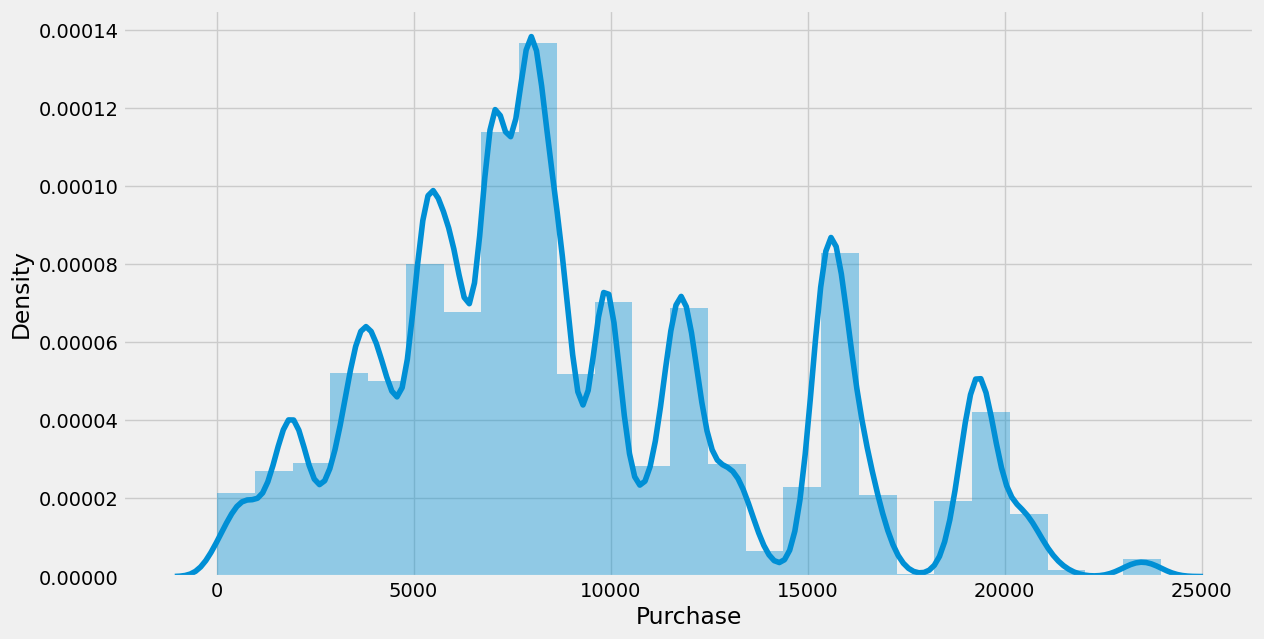

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(data['Purchase'],bins=25)

<Axes: xlabel='Gender', ylabel='count'>

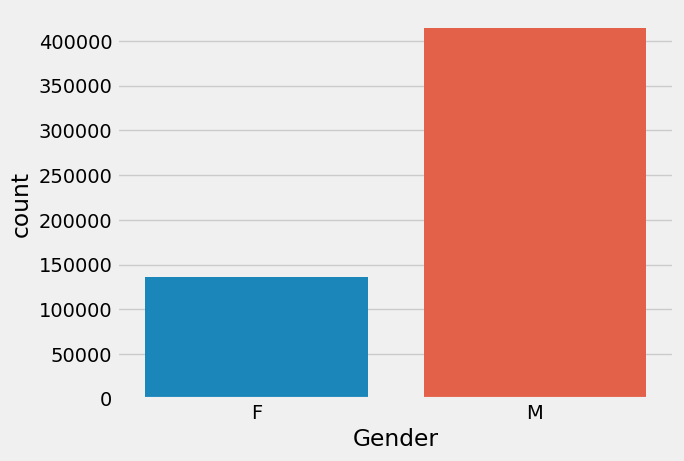

In [9]:
# univariate analysis
sns.countplot(data = data, x='Gender',hue = 'Gender')

<Axes: xlabel='Age', ylabel='count'>

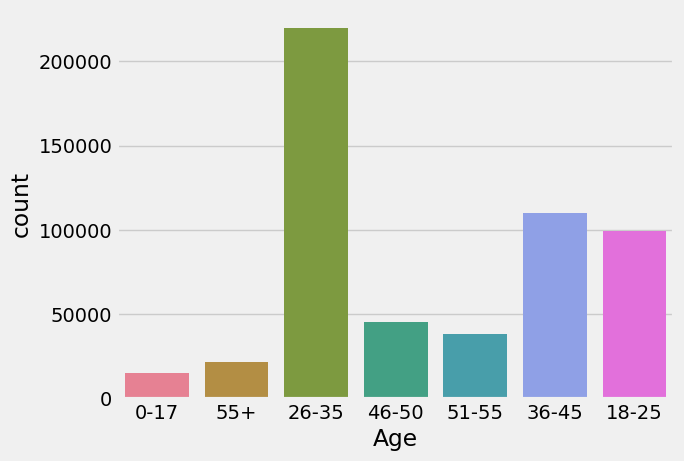

In [10]:
sns.countplot(data = data, x='Age',hue = 'Age')

<Axes: xlabel='Marital_Status', ylabel='count'>

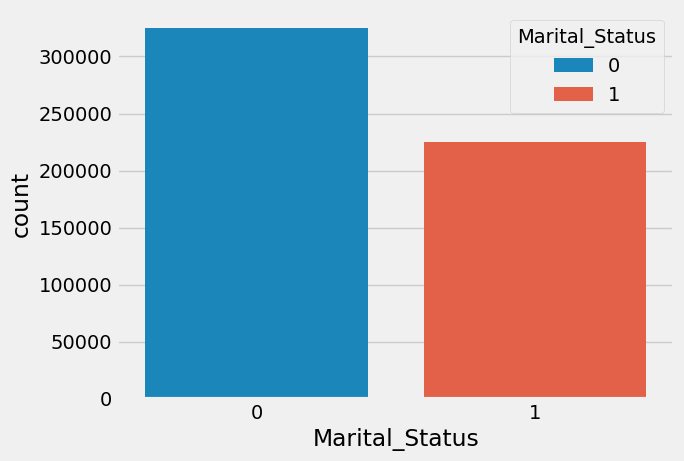

In [11]:
sns.countplot(data = data, x='Marital_Status',hue = 'Marital_Status')

<Axes: xlabel='Occupation', ylabel='count'>

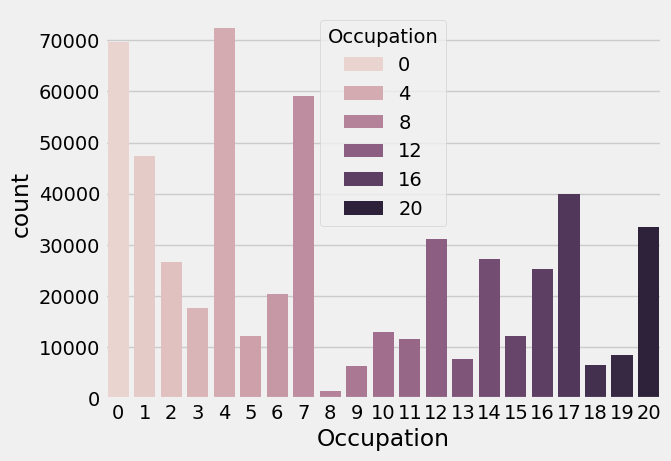

In [12]:
sns.countplot(data = data, x='Occupation',hue = 'Occupation')

<Axes: xlabel='Product_Category_1', ylabel='count'>

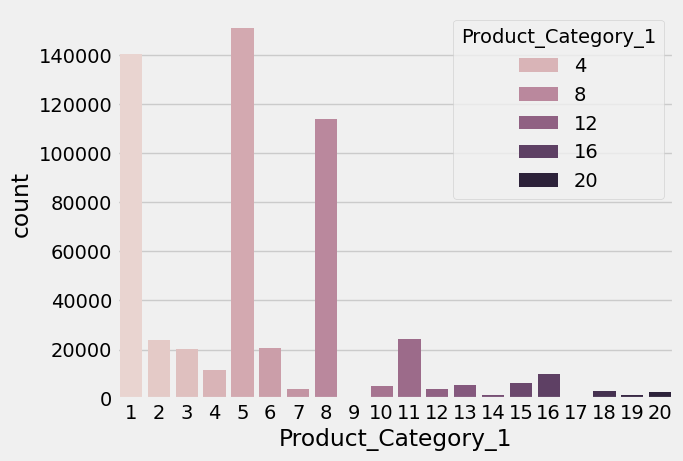

In [14]:
sns.countplot(data = data, x='Product_Category_1',hue = 'Product_Category_1')

<Axes: xlabel='Product_Category_2', ylabel='count'>

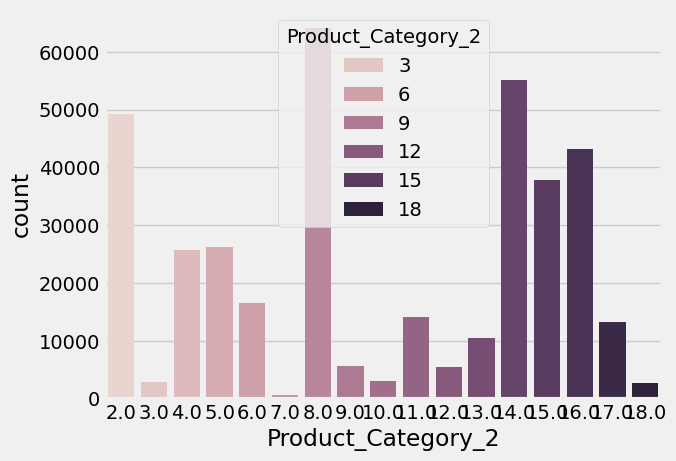

In [15]:
sns.countplot(data = data, x='Product_Category_2',hue = 'Product_Category_2')

<Axes: xlabel='Product_Category_3', ylabel='count'>

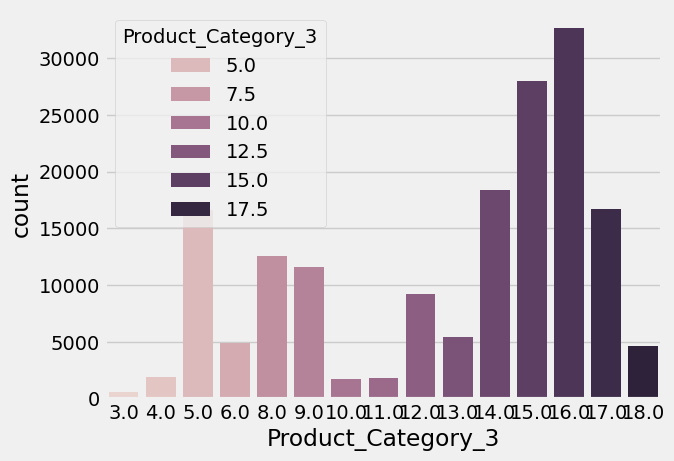

In [13]:
sns.countplot(data = data, x='Product_Category_3',hue = 'Product_Category_3')

<Axes: xlabel='City_Category', ylabel='count'>

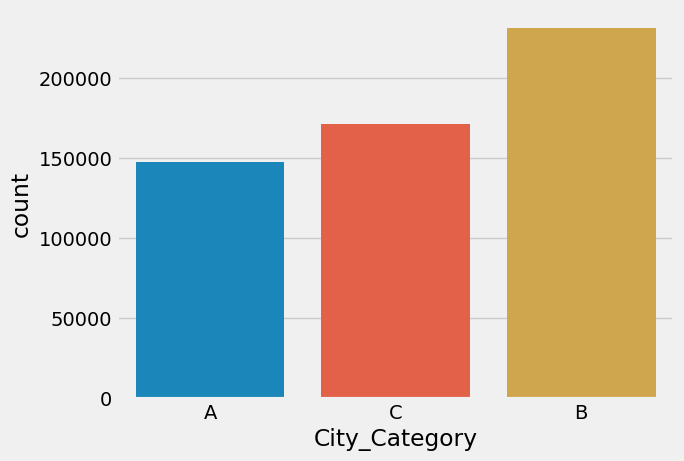

In [16]:
sns.countplot(data = data, x='City_Category',hue = 'City_Category')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

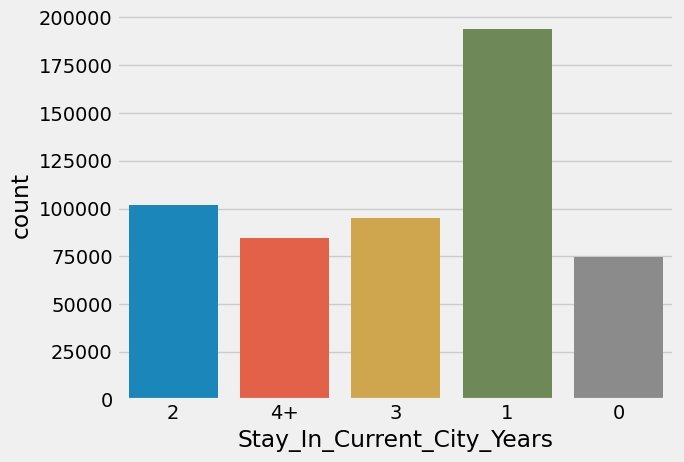

In [17]:
sns.countplot(data = data, x='Stay_In_Current_City_Years',hue = 'Stay_In_Current_City_Years')

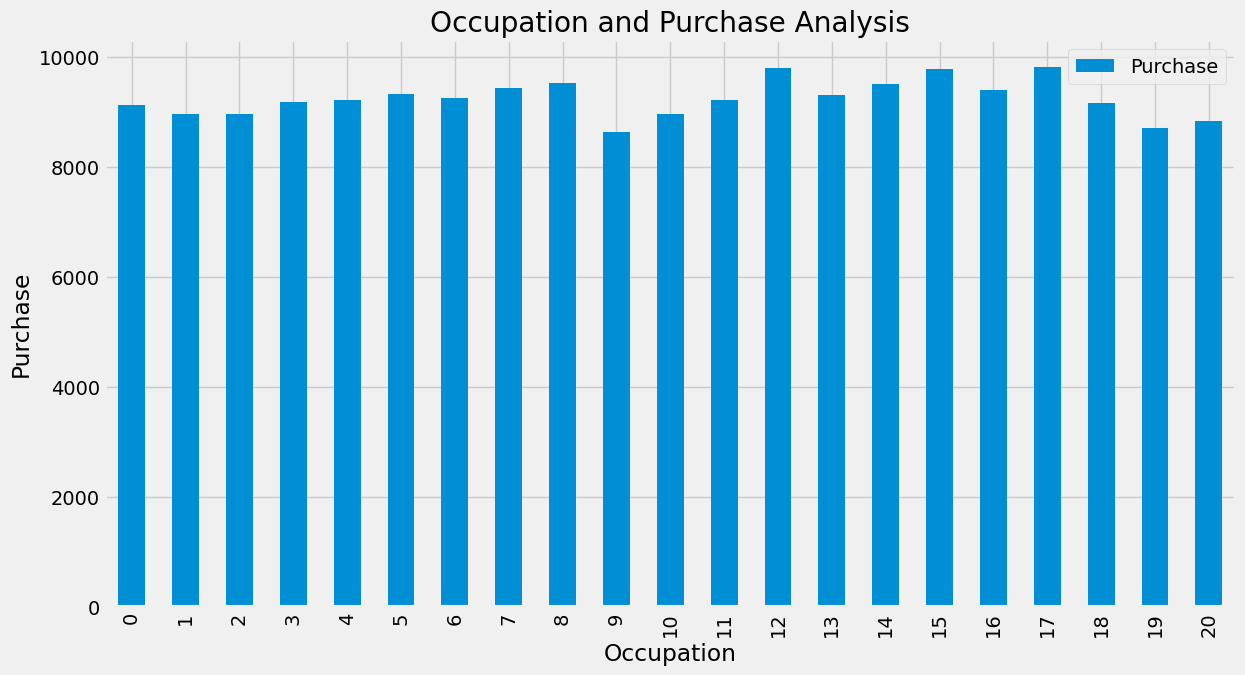

In [19]:
# bivariate analysis

occupation_plot = data.pivot_table(index='Occupation',values='Purchase',aggfunc=np.mean)
occupation_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation and Purchase Analysis')
plt.show()

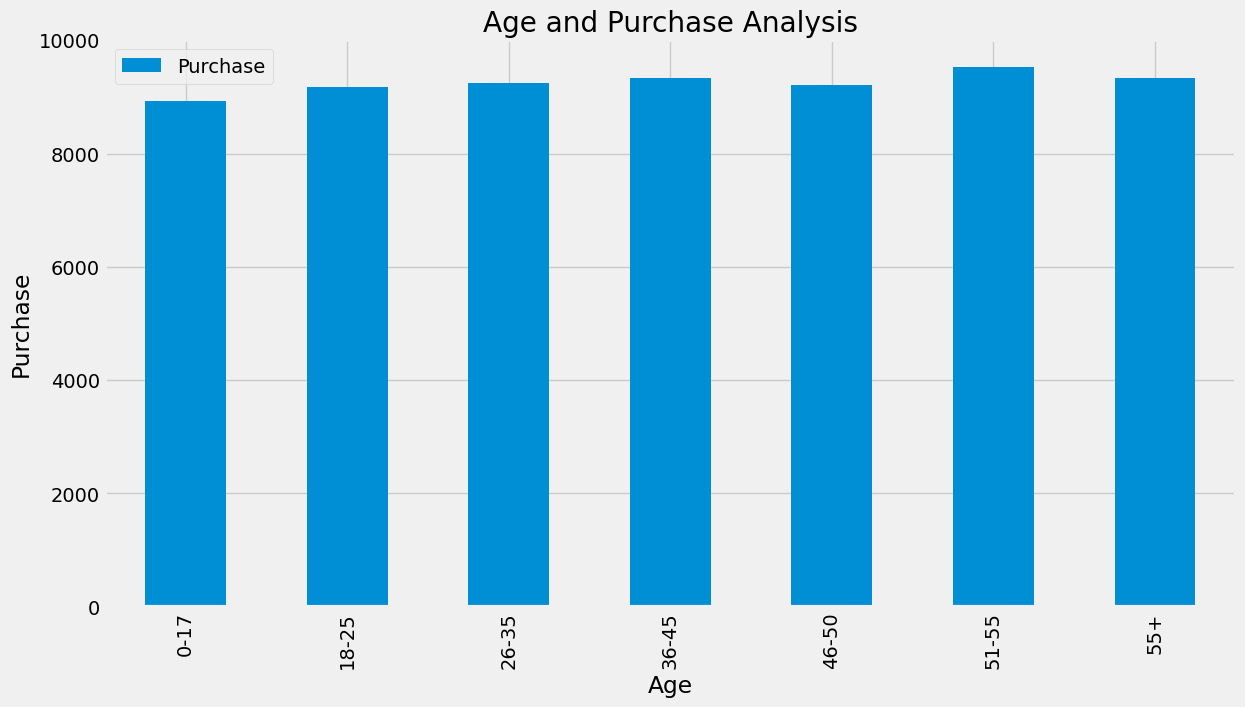

In [20]:
Age_plot = data.pivot_table(index='Age',values='Purchase',aggfunc=np.mean)
Age_plot.plot(kind='bar',figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Age and Purchase Analysis')
plt.show()

## Preprocessing the datasets

In [21]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [23]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(-2.0).astype('float32')
data['Product_Category_3'] = data['Product_Category_3'].fillna(-2.0).astype('float32')

In [24]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [25]:
# Encoding using dict

Gender_dict = {'F':0,'M':1}
data['Gender'] = data['Gender'].apply(lambda x:Gender_dict[x])

In [26]:
# label Encoding
# To improve the metric use one hot encoding

cols = ['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


## Correlation matrix

<Axes: >

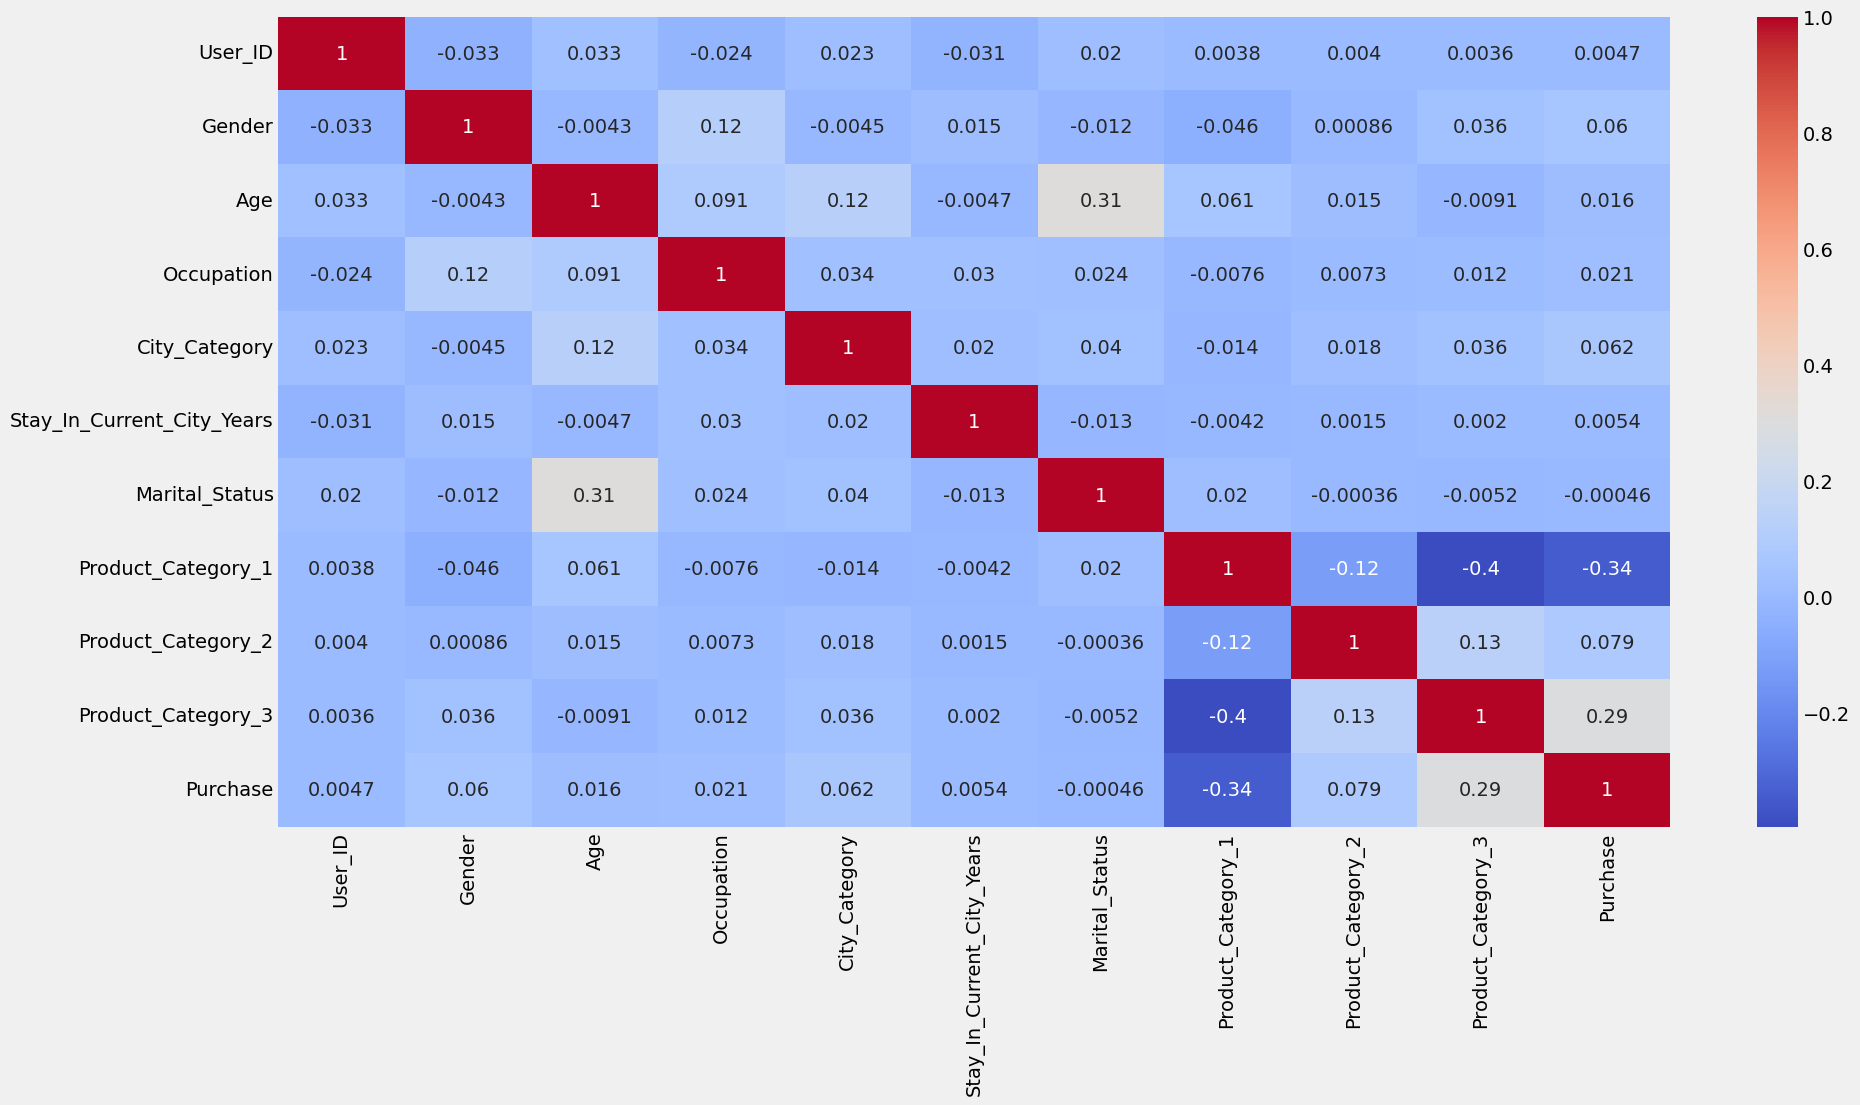

In [28]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

## Input Split

In [29]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [30]:
X = data.drop(columns = ['User_ID','Product_ID','Purchase'])
Y = data['Purchase']

## Model Training

In [33]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
def train(model,X,Y):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.25)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('MSE: ',np.sqrt(mean_squared_error(y_test,pred)))
    print('CV Score: ',np.sqrt(cv_score))

MSE:  4617.994034201719
CV Score:  4625.252945835687


<Axes: title={'center': 'Model Coefficients'}>

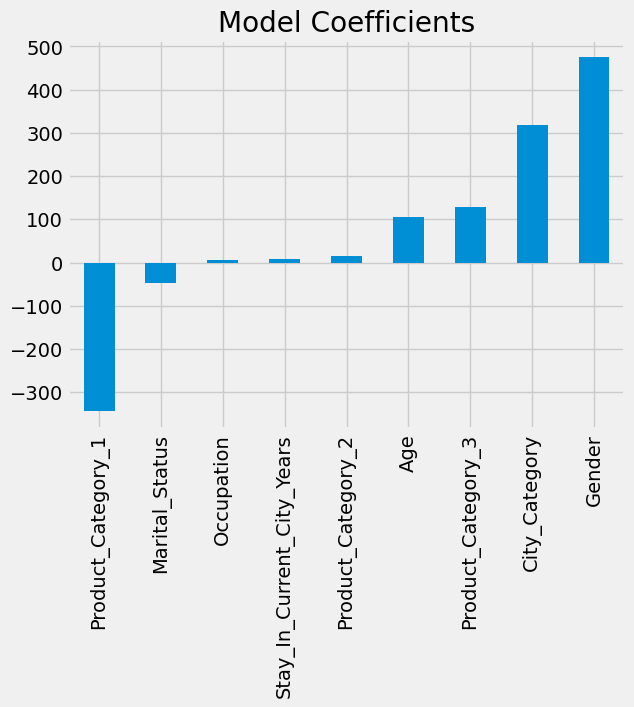

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model,X,Y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

MSE:  3367.4206687007836
CV Score:  3339.6022607122563


<Axes: title={'center': 'Feature importance'}>

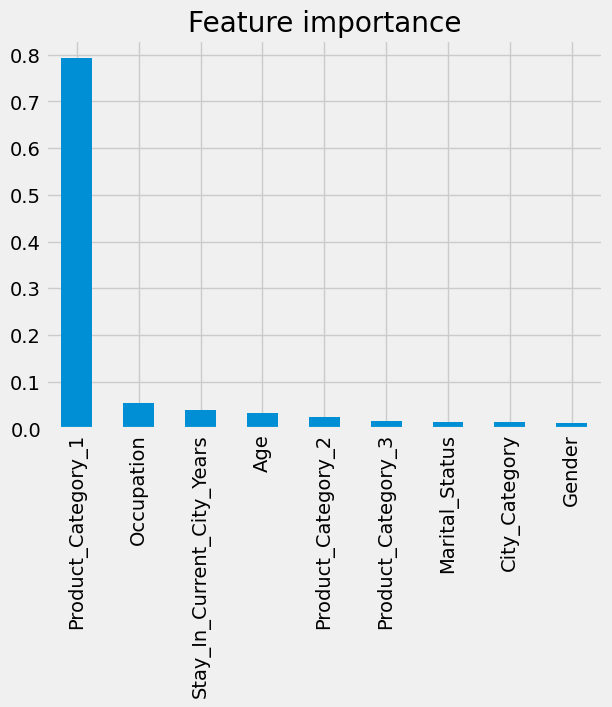

In [35]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X,Y)
features = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature importance')

MSE:  3064.048490717391
CV Score:  3052.5464674858285


<Axes: title={'center': 'Feature importance'}>

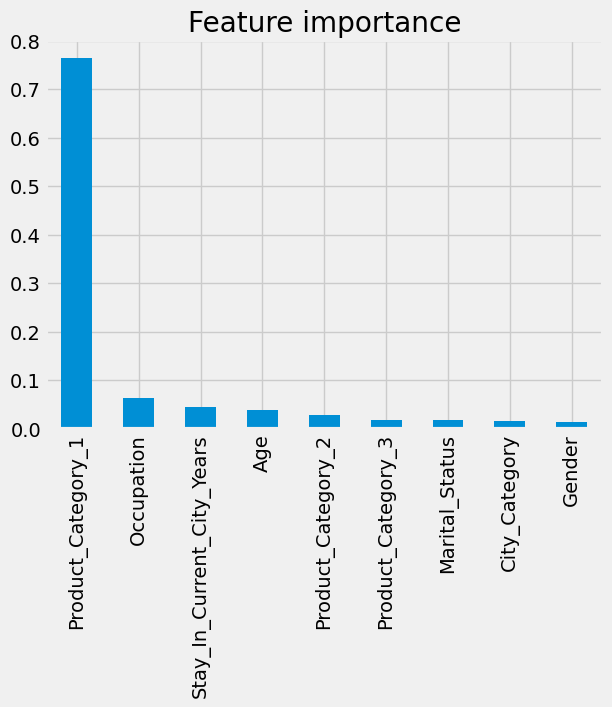

In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,X,Y)
features = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature importance')

MSE:  3194.6909521788143
CV Score:  3180.3066477714565


<Axes: title={'center': 'Feature importance'}>

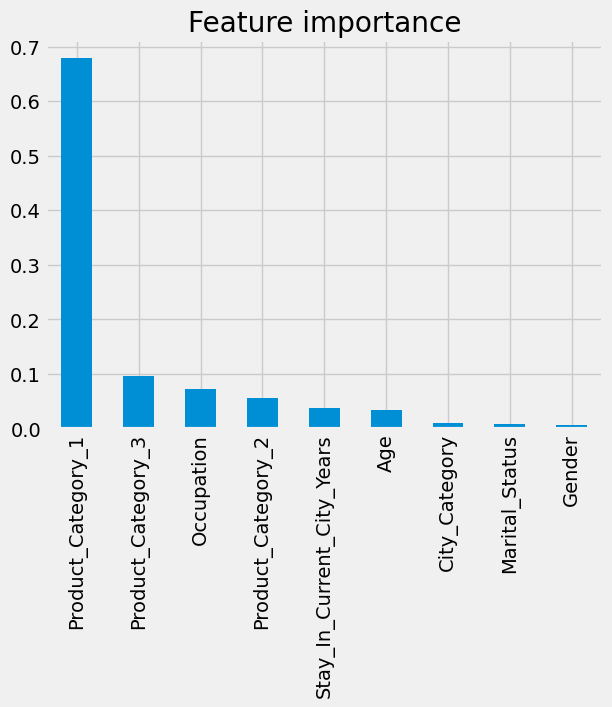

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,X,Y)
features = pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature importance')